This Script performs statistical analysis of the dataset that was given by the APIextraction script used earlier to modify the base dataset for included distance for each restaurant to a specific landmark.

In [1]:
#Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import hvplot.pandas #this is for reference only 
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# Read based datasets from /Data Folder, extract specific columns from dataframe and clean by dropping NA rows 
#(this takes into account the fact that some restaurants in Toronto are located on Toronto Island, which cannot be driven to)
tor_df = pd.read_csv("../Data/tor_data_chrisEdit.csv")
tor_df=tor_df[["Restaurant Name", "Rating", "Longitude", "Latitude", "Distance"]].dropna(how="any")
van_df= pd.read_csv("../Data/van_data_ChrisEdit.csv")
van_df=van_df[["Restaurant Name", "Rating", "Longitude", "Latitude", "Distance"]].dropna(how="any")

Question: Toronto Vs. Vancouver: Who has Better Restaurants?
The purpose of this analysis is to provide a broad general overview of the “quality” of restaurants available in each city, quality being determined by average reviews within each city. 

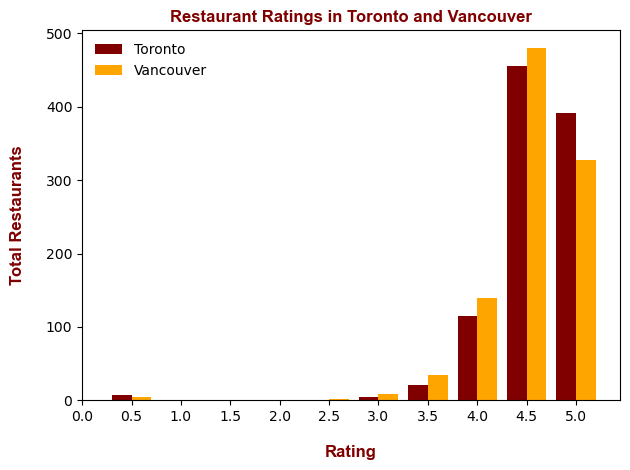

Toronto NormaltestResult(statistic=710.5969813838791, pvalue=4.963934747632233e-155)
Vancouver NormaltestResult(statistic=589.8227297653107, pvalue=8.348752392074616e-129)


In [3]:
#Create a histogram for general view of how many restaurants in each city falls into what rating

#bins are basically already defined as the data shows that Yelp reviews come in half star increments
n_bins = 10
fig, (ax) = plt.subplots()
x_axis=np.arange(0, 5.5, .5)

#creating a multi-plot histogram
x_multi = [tor_df['Rating'], van_df['Rating']]
plt.xlabel("Rating", fontsize=12, labelpad=15, fontname="Arial", fontweight="bold", color="maroon")
plt.ylabel("Total Restaurants", fontsize=12, labelpad=15, fontname="Arial", fontweight="bold", color="maroon")
plt.title('Restaurant Ratings in Toronto and Vancouver', fontsize=12, fontname="Arial", fontweight="bold", color="maroon")
ax.hist(x_multi, n_bins, label=["Toronto", "Vancouver"], histtype='bar', color=["maroon", "orange"], width=.2, align="right")

#styling elements
plt.legend(loc="upper left", frameon=False)
plt.xticks(x_axis)
fig.tight_layout()
plt.show()

#normal test results
normal_t=st.normaltest(tor_df['Rating'].sample(len(tor_df['Rating'])))
print(f"Toronto {normal_t}")
normal_v=st.normaltest(van_df['Rating'].sample(len(van_df['Rating'])))
print(f"Vancouver {normal_v}")

performing a normal test (null hypothesis: the distribution shows a null hypothesis) shows that this is the case, with the results shown of the alpha value being much greater than the p-value rejecting the null hypothesis. 

Use a Box and Whisker plot next for deeper statistical analysis

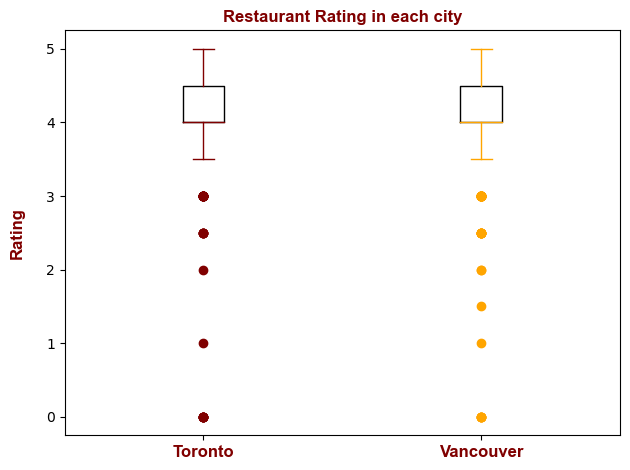

In [4]:
#Create a box and whisker plot 
plt.subplots()

#Box plot for Toronto
box1=plt.boxplot(tor_df["Rating"], positions=[1], 
            capprops=dict(color="maroon"),
            whiskerprops=dict(color="maroon"),
            flierprops=dict(color="maroon", markeredgecolor="maroon", markerfacecolor="maroon"),
            medianprops=dict(color="maroon"))

#Boxplot for Vancouver
box2=plt.boxplot(van_df["Rating"], positions=[2], 
            capprops=dict(color="orange"),
            whiskerprops=dict(color="orange"),
            flierprops=dict(color="orange", markeredgecolor="orange", markerfacecolor="orange"),
            medianprops=dict(color="orange"))

#Styling elements for the boxplot

plt.title('Restaurant Rating in each city',fontsize=12, fontname="Arial", fontweight="bold", color="maroon")
plt.ylabel('Rating', fontsize=12, labelpad=15, fontname="Arial", fontweight="bold", color="maroon")
plt.xticks([1, 2], ["Toronto", "Vancouver"], fontsize=12, fontname="Arial", fontweight="bold", color="maroon")
plt.tight_layout()
plt.show()


In [5]:
#Include statistical analysis of the above box and whisker plot, including quartiles, outliers, etc.

tquartiles = tor_df["Rating"].quantile([.25,.5,.75])
tlowerq = tquartiles[0.25]
tupperq = tquartiles[0.75]
tiqr = tupperq-tlowerq

print("For the city of Toronto")
print(f"The lower quartile is: {tlowerq}")
print(f"The upper quartile is: {tupperq}")
print(f"The interquartile range is: {tiqr}")
print(f"The the median is: {tquartiles[0.5]} ")

tlower_bound = tlowerq - (1.5*tiqr)
tupper_bound = tupperq + (1.5*tiqr)
print(f"Values below {tlower_bound} could be outliers.")
print(f"Values above {tupper_bound} could be outliers, which is not possible.")

vquartiles = van_df["Rating"].quantile([.25,.5,.75])
vlowerq = vquartiles[0.25]
vupperq = vquartiles[0.75]
viqr = vupperq-vlowerq

print("\nFor the city of Vancouver")
print(f"The lower quartile is: {vlowerq}")
print(f"The upper quartile is: {vupperq}")
print(f"The interquartile range is: {viqr}")
print(f"The the median is: {vquartiles[0.5]} ")

vlower_bound = vlowerq - (1.5*viqr)
vupper_bound = vupperq + (1.5*viqr)
print(f"Values below {vlower_bound} could be outliers.")
print(f"Values above {vupper_bound} could be outliers, which is not possible.")

For the city of Toronto
The lower quartile is: 4.0
The upper quartile is: 4.5
The interquartile range is: 0.5
The the median is: 4.0 
Values below 3.25 could be outliers.
Values above 5.25 could be outliers, which is not possible.

For the city of Vancouver
The lower quartile is: 4.0
The upper quartile is: 4.5
The interquartile range is: 0.5
The the median is: 4.0 
Values below 3.25 could be outliers.
Values above 5.25 could be outliers, which is not possible.


Statistically, both cities perform very similarly as far as rated restaurants go. Both cities have an interquartile range of 4-4.5 with a median rating of 4, and both cities (via the 1.5IQR test) show that restaurants with below 3.5 stars are considered outliers. There is very little statistical difference in restaurant ratings between the two cities. 

Question: Does Restaurant Distance from a Landmark affect its Rating? 

The r-squared is: 0.016820481368420633
PearsonRResult(statistic=0.12969379849638393, pvalue=3.966754766151683e-05)


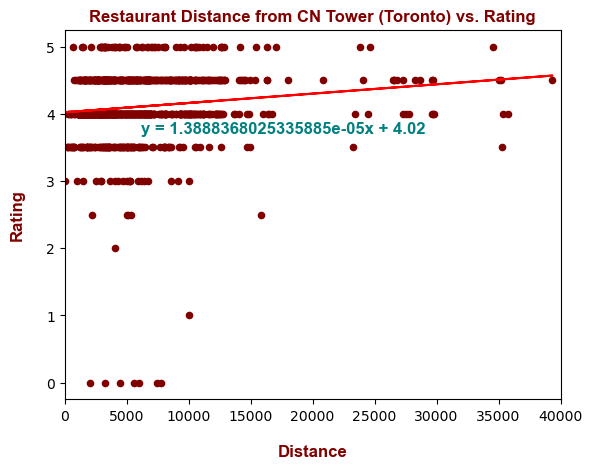

In [12]:
#Create Scatterplots of the distance vs. rating 

tor_df.plot(kind="scatter", x="Distance", y="Rating", xlim=(0, 40000), color="maroon")

#Pearson correlation
torcorrelation = st.pearsonr(tor_df["Distance"], tor_df["Rating"])

#linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(tor_df["Distance"], tor_df["Rating"])
regress_values = tor_df["Distance"] * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(round(intercept,2))
plt.plot(tor_df["Distance"],regress_values,"r-")
plt.annotate(line_eq,(tor_df["Distance"].mean()-1,tor_df["Rating"].mean()-.4), fontsize=12, fontname="Arial", fontweight="bold", color="teal")

#Styling
plt.title('Restaurant Distance from CN Tower (Toronto) vs. Rating',fontsize=12, fontname="Arial", fontweight="bold", color="maroon")
plt.xlabel("Distance", fontsize=12, labelpad=15, fontname="Arial", fontweight="bold", color="maroon")
plt.ylabel("Rating", fontsize=12, labelpad=15, fontname="Arial", fontweight="bold", color="maroon")

print(f"The r-squared is: {rvalue**2}")
print(torcorrelation)

The r-squared is: 0.000881199587707198
PearsonRResult(statistic=0.02968500610926668, pvalue=0.34837038519649094)


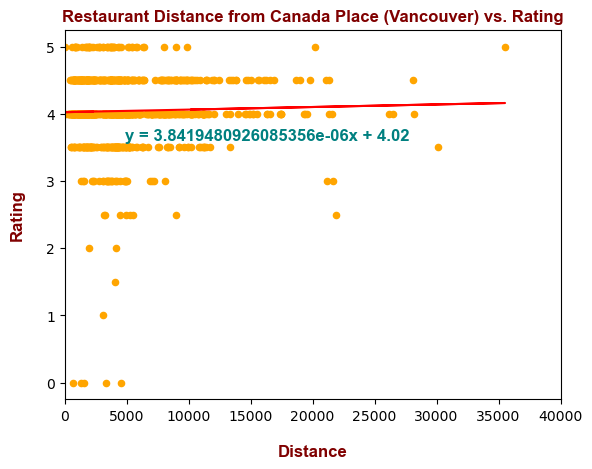

In [13]:
#Create Scatterplots of the distance vs. rating 
van_df.plot(kind="scatter", x="Distance", y="Rating", xlim=(0, 40000),color="orange")

#Pearson correlation
vancorrelation = st.pearsonr(van_df["Distance"], van_df["Rating"])

#linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(van_df["Distance"], van_df["Rating"])
regress_values = van_df["Distance"] * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(round(intercept,2))
plt.plot(van_df["Distance"],regress_values,"r-")

#Styling
plt.annotate(line_eq,(van_df["Distance"].mean()-1,tor_df["Rating"].mean()-0.5),fontsize=12, fontname="Arial", fontweight="bold", color="teal")
plt.title('Restaurant Distance from Canada Place (Vancouver) vs. Rating',fontsize=12, fontname="Arial", fontweight="bold", color="maroon")
plt.xlabel("Distance", fontsize=12, labelpad=15, fontname="Arial", fontweight="bold", color="maroon")
plt.ylabel("Rating", fontsize=12, labelpad=15, fontname="Arial", fontweight="bold", color="maroon")

print(f"The r-squared is: {rvalue**2}")
print(vancorrelation)